In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [3]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.50.post1', '1.0.1.post2')

In [4]:
torch.cuda.set_device(0)

In [5]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-bengali/language-model')

In [6]:
from inltk.tokenizer import BengaliTokenizer

In [7]:
BengaliTokenizer

inltk.tokenizer.BengaliTokenizer

In [8]:
# class BengaliTokenizer(BaseTokenizer):
#     def __init__(self, lang:str):
#         self.lang = lang
#         self.sp = spm.SentencePieceProcessor()
#         self.sp.Load(str(path/"../tokenizer/bengali_lm.model"))
        
#     def tokenizer(self, t:str) -> List[str]:
#         return self.sp.EncodeAsPieces(t)

In [9]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/bengali_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(30000)]

In [10]:
# 30,000 is the vocab size that we chose in sentencepiece
bengali_vocab = Vocab(itos)

In [11]:
tokenizer = Tokenizer(tok_func=BengaliTokenizer, lang='bn')

In [12]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [15]:
data_lm = TextLMDataBunch.from_folder(path=path/'BengaliDataset', tokenizer=tokenizer, vocab=bengali_vocab)

In [16]:
data_lm.batch_size

64

In [17]:
data_lm.save()

In [29]:
data_lm.show_batch()

idx,text
0,"▁x x bo s ▁ফিলো লাউ স ▁৩৮ ৫ ▁একজন ▁গ্রিক ▁দার্শনিক ▁এবং ▁একজন ▁পি থা গো রিয়ান . ▁প্রাক ▁- স ক্রেট িয় ▁দার্শনিক । ▁) ▁l ▁তাঁর ▁দর্শন ▁অনুসারে ▁সব ▁বস্তু ই ▁সীমিত ▁ও ▁অসীম ▁উপাদান ে ▁নির্মিত , ▁আর ▁মহাবিশ্ব ▁সংখ্যা ▁দ্বারা ▁নির্ধারিত ▁হয় । ▁পৃথিবী ▁যে ▁মহাবিশ্বের ▁কেন্দ্রস্থল ▁নয় , ▁এই ▁ধারণা ▁তিনিই ▁প্রথম ▁প্রবর্তন ▁করেন ▁বলে ▁মনে ▁করা ▁হয় । ▁তিনি ▁আরো ▁বিশ্বাস ▁করতেন ▁যে"
1,"এফ ডিসি তে । ▁ছবির ▁ডাবিং , ▁সম্পাদনা ▁ও ▁মুদ্রণ ▁হয় ▁মিরপুর ের ▁একটি ▁ব্যক্তি মালিক ানা ▁স্টুডিওতে । ▁নয়ন ের ▁আলো ▁চলচ্চিত্রের ▁গীত ▁রচনা ▁ও ▁সঙ্গীত ▁পরিচালনা ▁করেছেন ▁আহমেদ ▁ ইমতিয়াজ ▁বুলবুল । ▁এই ▁চলচ্চিত্র ▁দিয়ে ▁সঙ্গীত ▁পরিচালনা ▁শুরু ▁করেন ▁আহমেদ ▁ ইমতিয়াজ ▁বুলবুল । ▁১৯৯৮ ▁সালে ▁একই ▁নামে ▁টলিউড ে ▁আরেকটি ▁চলচ্চিত্র ▁নির্মাণ ▁করা ▁হয় , ▁তাতে ▁"" আমার ▁সারা দেহ ▁খে য়ো গো ▁মাটি "", ▁"" আমার"
2,▁৮ ▁জুন ▁২০১৪ ▁তারিখে ▁ব্রাজিলে ▁আসে । ▁ম্যাচ সেরা : মারি ও ▁গো ট জে ▁সহকারী ▁রেফারি গণ : রেন াতো ▁ফা ভেরা নি ▁আন্দ্রে য়া ▁ স্তে ফা নি ▁চতুর্থ ▁অফিসিয়াল : কার্ল োস ▁বের া ▁পঞ্চম ▁অফিসিয়াল : ক্রি স্ত িয়ান ▁লে স্কা নো ▁x x bo s ▁ডেনিস ▁ব্রুকস ▁লিডস ের ▁কিপাক্স ে ▁জন্মগ্রহণকারী ▁বিশিষ্ট ▁ইংরেজ ▁আন্তর্জাতিক ▁ক্রিকেটার ▁ছিলেন । ▁ইংল্যান্ড ▁ক্রিকেট ▁দলের ▁পক্ষে ▁একটিমাত্র ▁টেস্টে ▁অংশগ্রহণের
3,"▁এদের ▁গায়ে র ▁রঙ ▁হয় ▁সাদা ▁রঙের ▁এবং ▁এদের ▁পাখনা র ▁রঙ ▁হয় ▁কালো ▁এবং ▁এদের ▁ঠোঁট ▁গোলাপী ▁রঙের ▁হয় । ▁এদের ▁ঠোঁট কে ▁পাখিদের ▁মধ্যে ▁সব থেকে ▁দীর্ঘ ▁ঠোঁট ▁বলে ▁মানা ▁হয় । ▁এদের ▁প্রধান ▁খাদ্য ▁হল ▁মাছ । ▁x x bo s ▁অ্যানড্রয়েড ▁৬ . ০ ▁"" মার্ শ ম্যা লো "" ▁অ্যানড্রয়েড ▁মোবাইল ▁অপারেটিং ▁সিস্টেমের ▁একটি ▁সংস্করণ । ▁এটির ▁প্রথম ▁পর্দা ▁উন্মোচ িত ▁হয় ▁২০১৫ সালের ▁মে"
4,"▁দুই ▁ভাইয়ের ▁মধ্যে ▁ইউ লির ▁গণিতে ▁ও ▁ইয়ে ভ্ ▁জেনি র ▁চিত্রাঙ্কন ে ▁আগ্রহ ▁ছিল , ▁তাদের ▁মায়ের ▁ভাষ্য ▁অনুযায়ী , ▁"" ভান িয়া ▁জন্মের ▁মুহূর্ত ▁থেকেই ▁ভিন্ন ▁ছিল ... ▁অন্য ▁কেউ ▁তার ▁মত ▁নয় ।"" ▁১৮৮৭ ▁সালের ▁মে ▁মাসে ▁বুন িনের ▁প্রথম ▁কবিতা ▁দি রি ভিন ্ ▁স্কি য়ে ▁নি শ্ ▁ চিয়ে ▁সেন্ট ▁পিটার্সবার্গ ের ▁সাহিত্য ▁সাময়িকী ▁ র দিন ায় ▁প্রকাশিত ▁হয় । ▁১৮৯১ ▁সালে ▁তাঁর ▁প্রথম"


In [18]:
len(data_lm.vocab.itos)

30000

In [19]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

/home/gaurav/anaconda3/envs/fastai-bleed/lib/python3.6/site-packages/fastai/datasets.py:164: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  with open(fpath, 'r') as yaml_file: return yaml.load(yaml_file)


In [20]:
gc.collect()

49

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


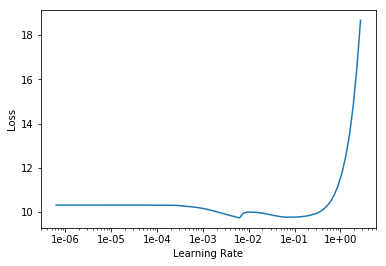

In [34]:
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.948041,4.842762,0.248783


In [36]:
learn.save('first', with_opt=True)

In [21]:
learn.load('first', with_opt=True);

In [38]:
learn.unfreeze()

In [39]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.827759,4.959311,0.236807
2,4.998166,4.927812,0.237777
3,4.654697,4.664890,0.260734
4,4.411924,4.356752,0.292806
5,4.221450,4.244792,0.308013


In [40]:
learn.save('second_bn_lm', with_opt=True)

In [22]:
learn.load('second_bn_lm', with_opt=True);

In [42]:
learn.fit_one_cycle(50, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.009347,4.237153,0.309086
2,4.068880,4.230307,0.310127
3,4.025786,4.222913,0.311233
4,4.084812,4.213515,0.312699
5,4.012681,4.202868,0.314369
6,4.017428,4.192035,0.316188
7,4.103319,4.177714,0.318278
8,3.976610,4.163298,0.320328
9,3.965150,4.146911,0.323207
10,3.977377,4.131856,0.324999


In [43]:
learn.save('third_bn_lm', with_opt=True)

In [23]:
learn.load('third_bn_lm', with_opt=True);

In [51]:
TEXT = "ফিলো লাউ"
N_WORDS = 40
N_SENTENCES = 2

In [52]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.9) for _ in range(N_SENTENCES)))

ফিলো লাউ টস ▁ ▁ডেল ইন ▁ ে গা জ ও ▁বে ▁জি ▁ছ য়ো ▁স্টি ▁ফা টি ▁ক ▁রে । ▁পে ▁ডিও ▁ভি ▁কে ▁চিন , ▁সাল গে ▁তে ▁দিল ▁রা ▁লাগা ▁ । স ন্দ ▁ন ▁ সী ▁রয়েছে ▁
ফিলো লাউ সন জ বা দ্য ▁পাই ▁নামেও ▁পরিচিত ▁রুহুল ▁সনে ▁প্রটোকল ▁দ্বারা ▁পরিচিত ▁একটি ▁বাজিয়ে । ▁সাধারন ▁প্রতিক্রিয়ায় ▁গীত ▁হওয়ার ▁কথা ▁বলতে ▁কিছুটা ▁একটা ▁পরিবর্তন ▁বা ▁পরিবর্তন ▁ঘটায় ▁উপ স ার্ধ নির্দেশ ▁করা ▁যেতে ▁পারে , ▁এবং ▁ ▁সি ও ▁


In [53]:
np.exp(3.72)

41.2643941086108

In [24]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [13]:
# Generating embedding vectors for visualization

In [14]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-bengali/language-model')

In [15]:
defaults.device = torch.device('cpu')

In [17]:
learn = load_learner(path / 'BengaliDataset/')

In [18]:
encoder = get_model(learn.model)[0]

In [19]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([30000, 400])

In [20]:
embeddings = encoder.state_dict()['encoder.weight']

In [21]:
embeddings = np.array(embeddings)

In [22]:
embeddings[0].shape

(400,)

In [23]:
df = pd.DataFrame(embeddings)

In [24]:
df.shape

(30000, 400)

In [25]:
df.to_csv('embeddings.tsv', sep='\t', index=False, header=False)

In [26]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,-0.113044,-0.280624,-0.467553,-0.661957,0.024588,0.353353,0.484770,0.474487,0.150466,0.243581,...,0.590394,-0.523701,0.345732,-0.003277,-0.932329,-0.216908,-0.278757,-0.049465,-0.315992,-1.150639
1,-0.209748,-0.196182,-0.205402,-0.233484,0.057311,-0.070529,-0.186705,0.112475,0.092018,-0.070301,...,0.131215,-0.203421,-0.157595,0.019562,-0.244218,-0.196894,0.190264,-0.052027,0.236541,-0.174639
2,-0.202627,-0.197063,-0.201548,-0.231052,0.056901,-0.067228,-0.185202,0.110842,0.092644,-0.070459,...,0.131723,-0.202194,-0.156960,0.019876,-0.249709,-0.195630,0.190940,-0.051310,0.238095,-0.171155
3,-1.046975,-0.163096,-0.310886,-0.636592,0.350110,-0.054391,0.830515,0.064007,-0.016510,0.042726,...,0.024607,-0.778754,0.104576,-0.000897,-0.728982,-0.809905,0.211798,-0.318993,0.576275,-0.487013
4,-0.769020,-0.241279,-0.626920,-0.779619,0.144031,-0.157478,0.260642,-0.190876,-0.003950,-0.154547,...,0.302810,-0.917235,0.015533,-0.062880,-0.391241,-0.913810,0.662305,-0.301348,1.001334,0.468030


In [27]:
df2 = pd.DataFrame(itos)

In [28]:
df2.head()

,0
0,<unk>
1,<s>
2,</s>
3,।
4,","


In [29]:
df2.shape

(30000, 1)

In [30]:
df2.to_csv('embeddings_metadata.tsv', sep='\t', index=False, header=False)

In [31]:
encoder.state_dict()['encoder.weight'][1]

tensor([-2.0975e-01, -1.9618e-01, -2.0540e-01, -2.3348e-01,  5.7311e-02,
        -7.0529e-02, -1.8671e-01,  1.1248e-01,  9.2018e-02, -7.0301e-02,
         9.7462e-02,  4.8933e-02, -2.0830e-01,  1.6536e-01, -9.6041e-02,
        -2.8939e-01,  2.0780e-01,  3.5581e-01, -9.9598e-02, -2.8169e-01,
        -6.7346e-02,  9.5075e-02,  6.5157e-02,  3.0202e-02,  4.0617e-02,
         3.1267e-01,  2.8607e-01,  7.7638e-02, -3.4083e-01, -1.3846e-01,
         3.5380e-02, -4.2937e-02, -7.8581e-02, -9.2947e-02, -4.3616e-02,
        -1.9825e-01, -1.3362e-01, -7.2964e-02,  4.4304e-01, -8.0956e-03,
        -4.2369e-02,  9.8648e-02, -1.3435e-01, -5.0511e-02, -1.1853e-01,
         4.4464e-02,  3.0527e-02, -6.5666e-02, -3.7080e-02, -1.6930e-01,
        -3.8039e-01, -4.8073e-02, -8.0869e-02,  7.1273e-02, -5.4129e-01,
        -3.0994e-01, -8.1238e-03, -1.0259e-01, -9.4719e-02,  1.0855e-01,
        -6.8363e-03,  8.4207e-02, -6.9806e-02,  9.5612e-02, -1.4546e-02,
        -1.6445e-01, -2.8120e-01, -2.3333e-01,  3.7